Datos de https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_delitos = pd.read_csv('Municipal-Delitos.csv',encoding='latin-1')

In [3]:
df_delitos.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0


In [4]:
df_delitos.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [5]:
delitos_edomex = df_delitos[df_delitos['Entidad']=='México']
delitos_edomex.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
64484,2015,15,México,15001,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
64485,2015,15,México,15001,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,0,0,0,0,0,0,1.0,0.0,0.0,0.0
64486,2015,15,México,15001,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
64487,2015,15,México,15001,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
64488,2015,15,México,15001,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


Vamos a dehacernos de las columnas que son innecesarias para nuestro análisis como Clave_Ent, Cve. Municipio.

In [6]:
delitos_edomex = delitos_edomex.drop(['Clave_Ent','Cve. Municipio'], axis=1)
delitos_edomex.head()

,Año,Entidad,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
64484,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0
64485,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
64486,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
64487,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
64488,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


Vamos a convertir los datos en las columnas de año, clave de entidad y clave de municipio en cadenas de caracteres para poder sumar.

In [7]:
delitos_edomex = delitos_edomex.astype({'Año':object})
delitos_edomex.dtypes

Año                        object
Entidad                    object
Municipio                  object
Bien jurídico afectado     object
Tipo de delito             object
Subtipo de delito          object
Modalidad                  object
Enero                       int64
Febrero                     int64
Marzo                       int64
Abril                       int64
Mayo                        int64
Junio                       int64
Julio                       int64
Agosto                      int64
Septiembre                float64
Octubre                   float64
Noviembre                 float64
Diciembre                 float64
dtype: object

In [8]:
delitos_edomex['Total'] = delitos_edomex.sum(axis=1,numeric_only=True)
delitos_edomex.head()

,Año,Entidad,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
64484,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0
64485,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0
64486,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
64487,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
64488,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_edomex = delitos_edomex.groupby(by='Municipio').sum()
df_edomex

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
Municipio,,,,,,,,,,,,,
Acambay de Ruíz Castañeda,348,392,374,386,417,366,367,415,337.0,345.0,348.0,355.0,4450.0
Acolman,1202,1142,1348,1251,1321,1247,1257,1342,1104.0,1077.0,1052.0,1012.0,14355.0
Aculco,192,182,224,200,202,202,198,226,160.0,179.0,173.0,186.0,2324.0
Almoloya de Alquisiras,47,57,49,46,57,58,31,57,51.0,46.0,45.0,50.0,594.0
Almoloya de Juárez,1210,1274,1510,1344,1452,1335,1252,1360,1074.0,1266.0,1143.0,1148.0,15368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zacazonapan,14,10,16,10,9,9,10,13,11.0,8.0,6.0,7.0,123.0
Zacualpan,33,40,50,34,22,29,39,47,34.0,39.0,36.0,47.0,450.0
Zinacantepec,1883,2019,2117,2062,2142,2058,2105,2065,1748.0,1901.0,1728.0,1766.0,23594.0


In [10]:
df_edomex.sort_values(by='Total',ascending=False,inplace=True)
df_edomex.head(10)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
Municipio,,,,,,,,,,,,,
Ecatepec de Morelos,24246,24048,27138,26128,27259,25749,25334,27182,23116.0,24250.0,22966.0,21784.0,299200.0
Toluca,15472,16530,17788,16773,17716,17232,17697,18001,14581.0,15710.0,14513.0,14109.0,196122.0
Naucalpan de Juárez,12779,13243,14204,13578,14127,14143,14101,14391,11884.0,12606.0,11678.0,11280.0,158014.0
Tlalnepantla de Baz,11122,11728,12810,12255,12457,12070,12186,12863,10604.0,11250.0,10806.0,10110.0,140261.0
Nezahualcóyotl,10543,11157,12631,11995,12052,11911,11470,11934,9844.0,10641.0,9964.0,9712.0,133854.0
Cuautitlán Izcalli,8280,8618,9657,8824,9253,8841,8891,9321,7721.0,7856.0,7225.0,7015.0,101502.0
Chimalhuacán,6164,6336,7205,7068,7202,6660,6513,6880,5774.0,5876.0,5501.0,5380.0,76559.0
Tecámac,5914,5726,6188,5860,6256,5966,5985,6361,5326.0,5889.0,5371.0,5208.0,70050.0
Atizapán de Zaragoza,5494,5843,6580,5939,6368,6210,6050,6093,5088.0,5315.0,5086.0,4961.0,69027.0


De esta manera obtenemos los 10 municipios con más incidencia delictiva.

Text(0.5, 1.0, 'Municipios con más delitos en el periodo Enero 2015-Septiembre2021')

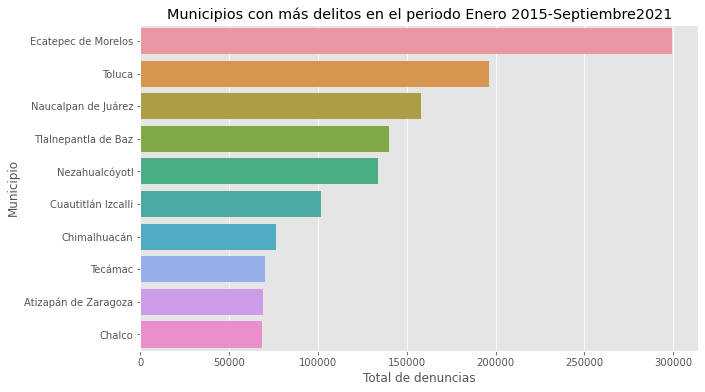

In [33]:
f, ax = plt.subplots(figsize=(10,6))
sns.barplot(y=df_edomex[['Total']].head(10).index, x=df_edomex[['Total']].head(10)['Total'], data = df_edomex[['Total']].head(10))
ax.set_xlabel('Total de denuncias')
ax.set_title('Municipios con más delitos en el periodo Enero 2015-Septiembre2021')

¿Cómo han ido crecienco o decreciendo los delitos conforme pasan los años?

In [12]:
delitos_edomex_2015_2020 = delitos_edomex[delitos_edomex['Año']!=2021]
delitos_edomex_2015_2020.head()

,Año,Entidad,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
64484,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0
64485,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0
64486,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
64487,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
64488,2015,México,Acambay de Ruíz Castañeda,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_años = delitos_edomex_2015_2020.groupby(by='Año').sum()

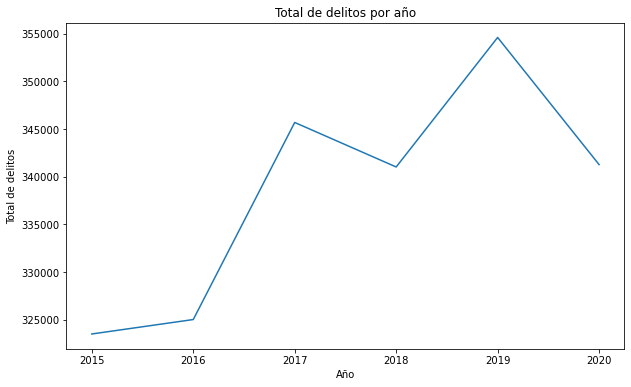

In [14]:
df_años['Total'].plot(kind='line', figsize=(10,6))
plt.xlabel('Año')
plt.ylabel('Total de delitos')
plt.title('Total de delitos por año')
plt.show()

¿En qué mes se cometen más delitos?

In [15]:
df_1 = delitos_edomex.groupby(by='Año', dropna=False).sum(min_count=1)
df_1

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
Año,,,,,,,,,,,,,
2015,26880,26096,28637,27168,27017,27230,26615,26633,26964.0,27553.0,27083.0,25649.0,323525.0
2016,23896,28864,30349,30766,31514,25084,23393,25537,26734.0,27235.0,25666.0,26000.0,325038.0
2017,24655,24277,28320,26438,30573,29942,29823,31386,29149.0,32498.0,30113.0,28519.0,345693.0
2018,26899,26103,28173,29247,30450,28568,28506,29796,28561.0,30474.0,27683.0,26568.0,341028.0
2019,25117,25595,29759,28056,32089,30920,30820,31165,30436.0,31702.0,29667.0,29276.0,354602.0
2020,29429,29815,29960,24907,22883,25990,28262,30027,29935.0,31768.0,29505.0,28796.0,341277.0
2021,27382,29086,34834,32850,33916,32687,32555,32797,NaN,NaN,NaN,NaN,256107.0


In [16]:
df_1.loc['Promedio'] = df_1.mean(axis=0,numeric_only=True)
df_1

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
Año,,,,,,,,,,,,,
2015,26880.000000,26096.000000,28637.000000,27168.000000,27017.000000,27230.000000,26615.000000,26633.000000,26964.000000,27553.0,27083.000000,25649.0,323525.000000
2016,23896.000000,28864.000000,30349.000000,30766.000000,31514.000000,25084.000000,23393.000000,25537.000000,26734.000000,27235.0,25666.000000,26000.0,325038.000000
2017,24655.000000,24277.000000,28320.000000,26438.000000,30573.000000,29942.000000,29823.000000,31386.000000,29149.000000,32498.0,30113.000000,28519.0,345693.000000
2018,26899.000000,26103.000000,28173.000000,29247.000000,30450.000000,28568.000000,28506.000000,29796.000000,28561.000000,30474.0,27683.000000,26568.0,341028.000000
2019,25117.000000,25595.000000,29759.000000,28056.000000,32089.000000,30920.000000,30820.000000,31165.000000,30436.000000,31702.0,29667.000000,29276.0,354602.000000
2020,29429.000000,29815.000000,29960.000000,24907.000000,22883.000000,25990.000000,28262.000000,30027.000000,29935.000000,31768.0,29505.000000,28796.0,341277.000000
2021,27382.000000,29086.000000,34834.000000,32850.000000,33916.000000,32687.000000,32555.000000,32797.000000,NaN,NaN,NaN,NaN,256107.000000
Promedio,26322.571429,27119.428571,30004.571429,28490.285714,29777.428571,28631.571429,28567.714286,29620.142857,28629.833333,30205.0,28286.166667,27468.0,326752.857143


In [17]:
df_1

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
Año,,,,,,,,,,,,,
2015,26880.000000,26096.000000,28637.000000,27168.000000,27017.000000,27230.000000,26615.000000,26633.000000,26964.000000,27553.0,27083.000000,25649.0,323525.000000
2016,23896.000000,28864.000000,30349.000000,30766.000000,31514.000000,25084.000000,23393.000000,25537.000000,26734.000000,27235.0,25666.000000,26000.0,325038.000000
2017,24655.000000,24277.000000,28320.000000,26438.000000,30573.000000,29942.000000,29823.000000,31386.000000,29149.000000,32498.0,30113.000000,28519.0,345693.000000
2018,26899.000000,26103.000000,28173.000000,29247.000000,30450.000000,28568.000000,28506.000000,29796.000000,28561.000000,30474.0,27683.000000,26568.0,341028.000000
2019,25117.000000,25595.000000,29759.000000,28056.000000,32089.000000,30920.000000,30820.000000,31165.000000,30436.000000,31702.0,29667.000000,29276.0,354602.000000
2020,29429.000000,29815.000000,29960.000000,24907.000000,22883.000000,25990.000000,28262.000000,30027.000000,29935.000000,31768.0,29505.000000,28796.0,341277.000000
2021,27382.000000,29086.000000,34834.000000,32850.000000,33916.000000,32687.000000,32555.000000,32797.000000,NaN,NaN,NaN,NaN,256107.000000
Promedio,26322.571429,27119.428571,30004.571429,28490.285714,29777.428571,28631.571429,28567.714286,29620.142857,28629.833333,30205.0,28286.166667,27468.0,326752.857143


In [18]:
meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

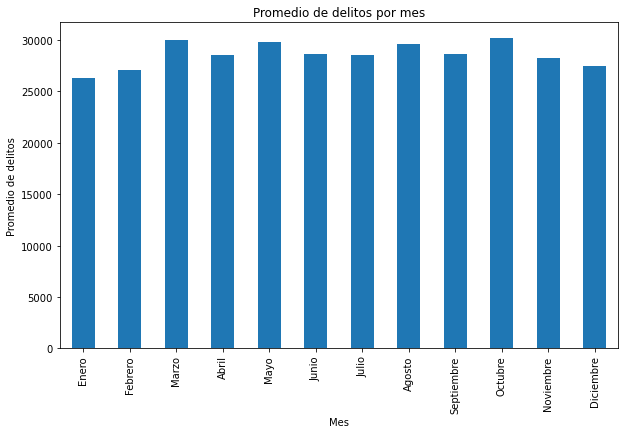

In [19]:
df_1.loc['Promedio'][meses].plot(kind='bar', figsize=(10,6))
plt.xlabel('Mes')
plt.ylabel('Promedio de delitos')
plt.title('Promedio de delitos por mes')
plt.show()

El mes en el que se cometen menos delitos es Enero, mientras que octubre es el mes en el que se cometen más delitos en promedio.

In [20]:
def top10_subtipos(año):
    df_año = delitos_edomex[delitos_edomex['Año']==año]
    df_subtipos = df_año.groupby(by='Subtipo de delito').sum()
    df_subtipos= df_subtipos.sort_values(by='Total', ascending=False)
    
    df_subtipos['Total'].head(10).plot(kind='bar', figsize=(10,6))
    plt.xlabel('Subtipo de delito')
    plt.ylabel('Total de denuncias')
    plt.title('Delitos más denunciados en el año' + ' '+ str(año))
    plt.show()

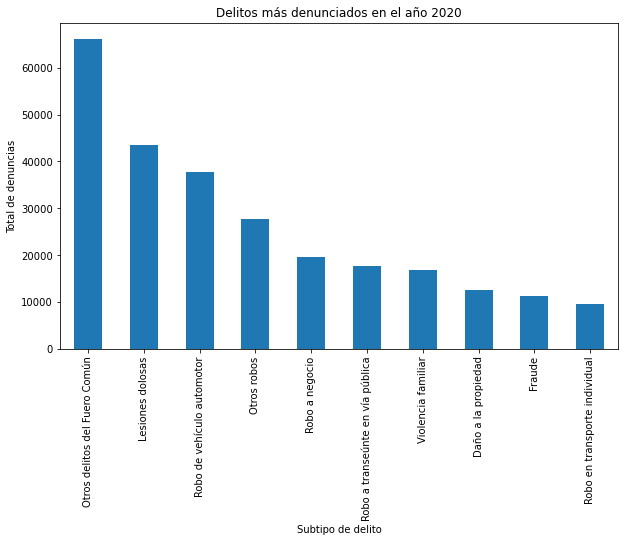

In [21]:
top10_subtipos(2020)

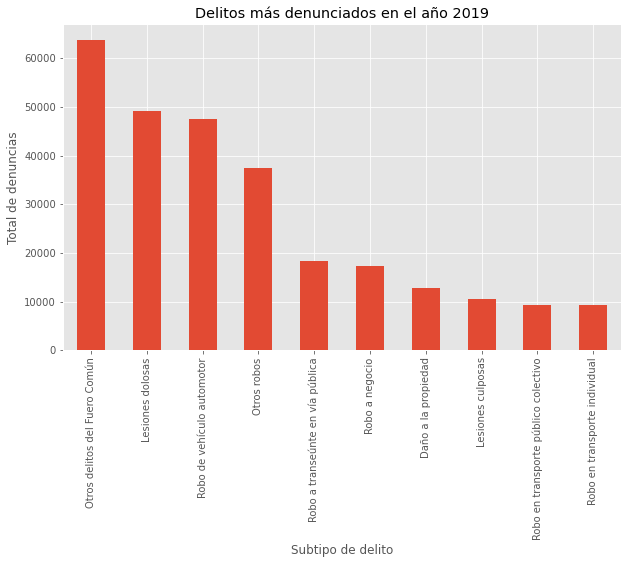

In [34]:
top10_subtipos(2019)

Ahora, ¿cuáles han sido los delitos más denunciados en tu municipio en lo que va del año 2021?

In [56]:
def delitos_mas_denunciados(municipio):
    df_año = delitos_edomex[(delitos_edomex['Año']==2021)&(delitos_edomex['Municipio']==municipio)]
    df_año = df_año.groupby(by='Subtipo de delito').sum()
    df_año = df_año.sort_values(by='Total',ascending=False)
    df_año['Total'].head(10).plot(kind='bar', figsize=(10,6))
    plt.xlabel('Subtipo de delito')
    plt.ylabel('Total de denuncias')
    plt.title('Delitos más denunciados en el municipio' + ' '+ str(municipio) + ' ' + 'durante 2021')
    plt.show()

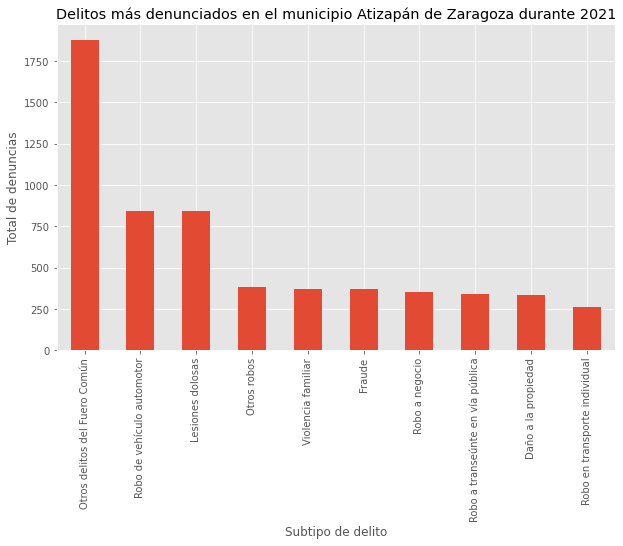

In [57]:
delitos_mas_denunciados('Atizapán de Zaragoza')

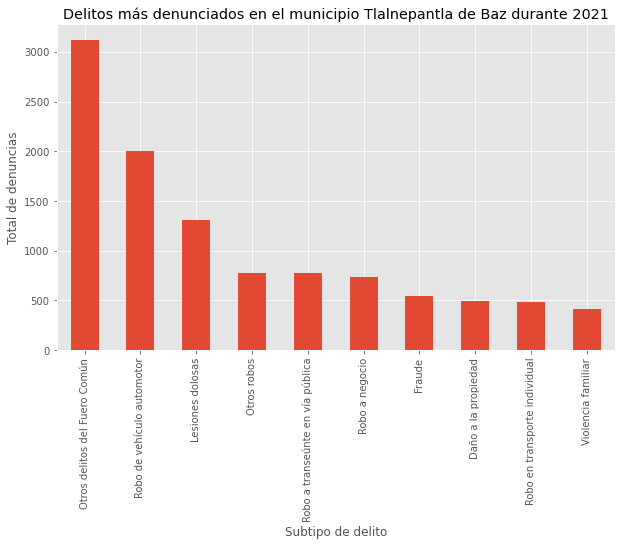

In [58]:
delitos_mas_denunciados('Tlalnepantla de Baz')

Es de llamar la atención la aparición de violencia familiar entre los delitos más denunciados para el año 2020, la causa de esto puede ser el confinamiento por la contingencia sanitaria derivada del COVID-19, debido a que las víctimas fueron obligadas a pasar más tiempo con sus agresores.

In [23]:
df_familiar = delitos_edomex[(delitos_edomex['Subtipo de delito']=='Violencia familiar')&(delitos_edomex['Año']!=2021)]
df_familiar

,Año,Entidad,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
64565,2015,México,Acambay de Ruíz Castañeda,La familia,Violencia familiar,Violencia familiar,Violencia familiar,1,0,2,1,3,1,1,4,0.0,3.0,5.0,4.0,25.0
64663,2015,México,Acolman,La familia,Violencia familiar,Violencia familiar,Violencia familiar,3,0,0,0,0,1,5,0,4.0,3.0,1.0,3.0,20.0
64761,2015,México,Aculco,La familia,Violencia familiar,Violencia familiar,Violencia familiar,1,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,3.0
64859,2015,México,Almoloya de Alquisiras,La familia,Violencia familiar,Violencia familiar,Violencia familiar,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0
64957,2015,México,Almoloya de Juárez,La familia,Violencia familiar,Violencia familiar,Violencia familiar,5,2,5,2,4,3,12,2,1.0,5.0,1.0,3.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181275,2020,México,Cuautitlán Izcalli,La familia,Violencia familiar,Violencia familiar,Violencia familiar,22,36,36,41,42,53,67,71,69.0,69.0,69.0,68.0,643.0
1181373,2020,México,Valle de Chalco Solidaridad,La familia,Violencia familiar,Violencia familiar,Violencia familiar,11,20,17,39,43,39,40,38,26.0,23.0,26.0,33.0,355.0
1181471,2020,México,Luvianos,La familia,Violencia familiar,Violencia familiar,Violencia familiar,0,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,2.0
1181569,2020,México,San José del Rincón,La familia,Violencia familiar,Violencia familiar,Violencia familiar,2,2,0,2,0,0,4,3,2.0,0.0,1.0,0.0,16.0


In [24]:
df_familiar = df_familiar.groupby(by='Año').sum()
df_familiar

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
Año,,,,,,,,,,,,,
2015,325,281,341,360,325,453,460,467,475.0,434.0,417.0,384.0,4722.0
2016,321,468,443,537,626,444,443,437,490.0,437.0,397.0,431.0,5474.0
2017,370,477,545,556,618,651,588,681,600.0,647.0,626.0,501.0,6860.0
2018,468,547,644,589,568,557,489,445,510.0,704.0,488.0,487.0,6496.0
2019,480,541,634,638,768,889,785,861,921.0,956.0,893.0,883.0,9249.0
2020,884,995,998,1449,1392,1616,1594,1592,1716.0,1639.0,1524.0,1516.0,16915.0


In [59]:
16915-9249

7666

In [61]:
(7666/9249)*100

82.88463617688399

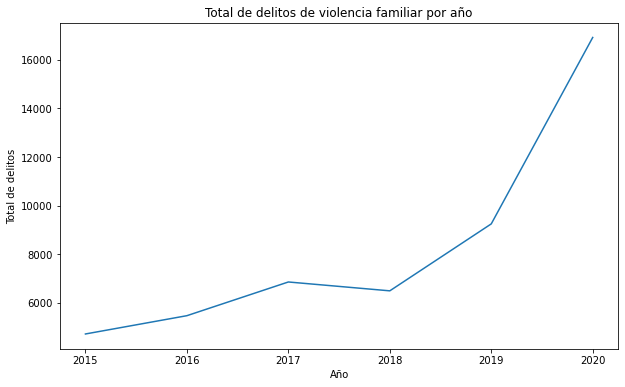

In [25]:
df_familiar['Total'].plot(kind='line', figsize=(10,6))
plt.xlabel('Año')
plt.ylabel('Total de delitos')
plt.title('Total de delitos de violencia familiar por año')
plt.show()

* Se observa claramente que la violencia familiar tuvo un incremento significativo, de 7666 casos para el año 2020, lo que equivale a un aumento del 83% con respecto al año anterior.

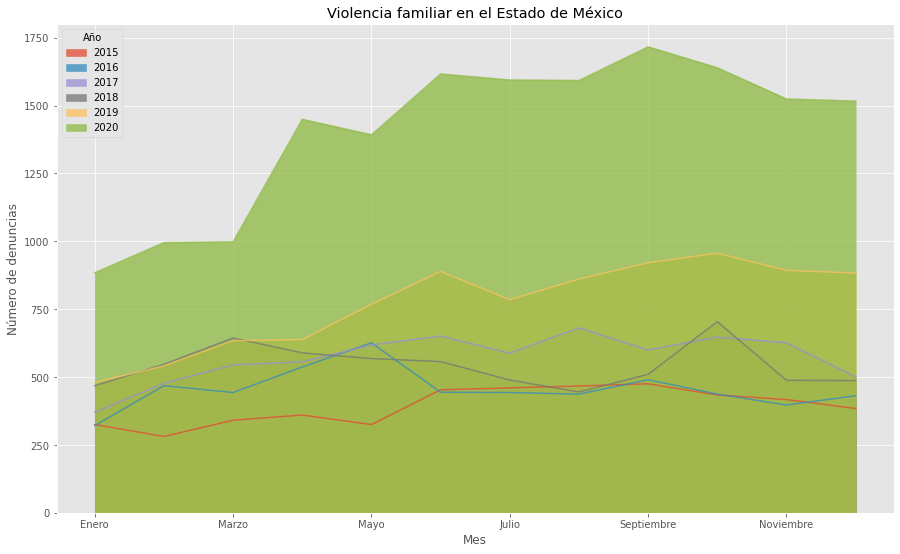

In [26]:
plt.style.use('ggplot')
ax = df_familiar[meses].transpose().plot(kind='area',
               stacked=False,
               alpha=0.75,
                figsize=(15,9))
ax.set_title('Violencia familiar en el Estado de México')
ax.set_xlabel('Mes')
ax.set_ylabel('Número de denuncias')
    
plt.show()

* En este gráfico se observa que el mes en el que se observó un aumento más significativo de casos de violencia familiar fue en Abril de 2020, el mismo en el que inició el confinamiento por el Covid-19

Además de la violencia familiar que tuvo un incremento significativo, ¿qué otros delitos se incrementaron significativamente debido al confinamiento de Abril 2020?

In [65]:
df_2020 = delitos_edomex[delitos_edomex['Año']==2020]
df_2020 = df_2020.groupby(by='Subtipo de delito').sum()
df_2020['Diferencia porcentual'] = ((df_2020['Abril'] - df_2020['Marzo'])/df_2020['Marzo'])*100 #Agregamos la diferencia porcentual
df_2020 = df_2020.drop(df_2020[df_2020['Total']<1000].index) #Para filtrar mejor los resultados, quitaremos todos los delitos que tuvieron una incidencia menor a 1000 denuncias.
df_2020 = df_2020.sort_values(by='Diferencia porcentual',ascending=False,key=abs) #Ordenamos los resultados.
df_2020

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total,Diferencia porcentual
Subtipo de delito,,,,,,,,,,,,,,
Violencia de género en todas sus modalidades distinta a la violencia familiar,105,116,123,214,169,170,183,180,200.0,161.0,148.0,220.0,1989.0,73.983740
Incumplimiento de obligaciones de asistencia familiar,174,200,155,53,58,116,123,211,232.0,286.0,212.0,175.0,1995.0,-65.806452
Narcomenudeo,336,370,332,141,259,279,315,368,458.0,448.0,381.0,254.0,3941.0,-57.530120
Otros delitos que atentan contra la vida y la integridad corporal,68,75,88,135,95,108,97,92,72.0,83.0,88.0,85.0,1086.0,53.409091
Robo a transportista,381,346,314,469,364,486,452,430,391.0,423.0,449.0,474.0,4979.0,49.363057
Otros delitos contra la sociedad,436,438,350,179,200,209,268,373,445.0,535.0,528.0,502.0,4463.0,-48.857143
Violencia familiar,884,995,998,1449,1392,1616,1594,1592,1716.0,1639.0,1524.0,1516.0,16915.0,45.190381
Lesiones culposas,910,1065,1193,716,562,687,791,653,597.0,696.0,684.0,649.0,9203.0,-39.983236
Homicidio culposo,77,56,73,102,70,103,84,103,92.0,114.0,140.0,120.0,1134.0,39.726027


In [66]:
df_2020.head(10)['Diferencia porcentual']

Subtipo de delito
Violencia de género en todas sus modalidades distinta a la violencia familiar    73.983740
Incumplimiento de obligaciones de asistencia familiar                           -65.806452
Narcomenudeo                                                                    -57.530120
Otros delitos que atentan contra la vida y la integridad corporal                53.409091
Robo a transportista                                                             49.363057
Otros delitos contra la sociedad                                                -48.857143
Violencia familiar                                                               45.190381
Lesiones culposas                                                               -39.983236
Homicidio culposo                                                                39.726027
Abuso sexual                                                                    -39.285714
Name: Diferencia porcentual, dtype: float64

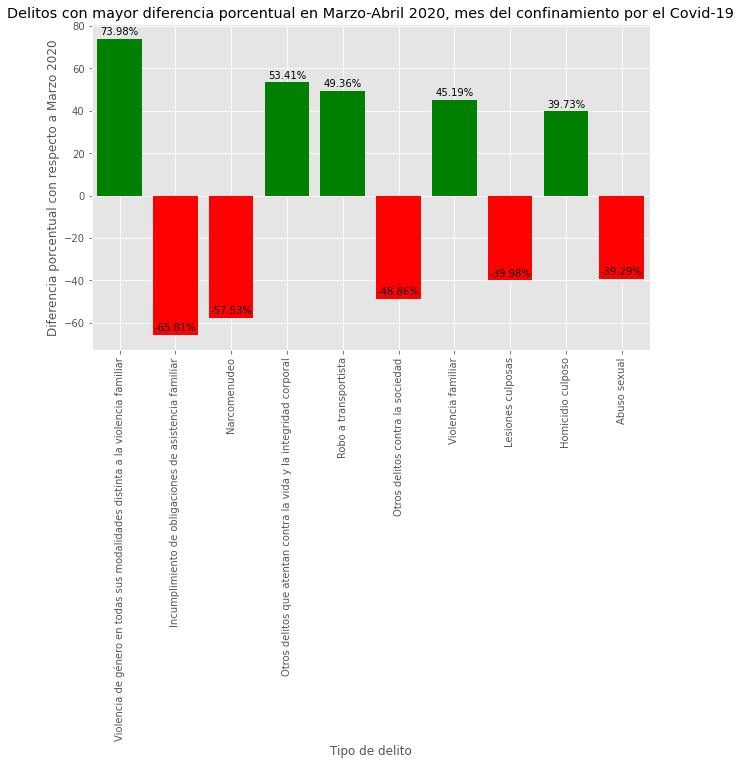

In [32]:
clr=[]
for value in df_2020.head(10)['Diferencia porcentual']:
    if value < 0:
        clr.append('red')
    elif value > 0:
        clr.append('green')
clr        
ax = df_2020.head(10)['Diferencia porcentual'].plot(kind='bar',
                figsize=(10,6))
ax.set_title('Delitos con mayor diferencia porcentual en Marzo-Abril 2020, mes del confinamiento por el Covid-19')
ax.set_xlabel('Tipo de delito')
ax.set_ylabel('Diferencia porcentual con respecto a Marzo 2020')
ax.bar(x=df_2020.head(10).index, height=df_2020.head(10)['Diferencia porcentual'], color=clr)
values= df_2020.head(10)['Diferencia porcentual'].tolist()
for index,data in enumerate(values):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}%" , fontdict=dict(fontsize=10), va='bottom', ha='center')
    
plt.show()

* Se puede observar que algunos de los delitos que más sufrieron cambios debido al confinamiento están relacionados con el género o la movilidad.
* Sorpresivamente, el robo a transportista aumentó, cuando se podría pensar que con la disminución de la movilidad este podría disminuir.
